# Data Whitening #
Data whitening is the process of applying a linear transformation to a dataset in order to transform the features into ones that are decorrolated and have identical variances. In the following assignment, we will walk you through some of the visualizations that you should have seen in the slides as well as see how data whitening works for images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

First let us generate a dataset that we can use to visualize data whitening:

In [2]:
np.random.seed(1)
mu = [1, 3]
sigma = [[5, 3], [3, 5]] 
n = 1000
x = np.random.multivariate_normal(mu, sigma, size=n).T
set1 = np.argsort(np.linalg.norm(x, axis=0))[-20:]
set2 = list(set(range(n))-set(set1))

Text(0.5,1,'Raw Data')

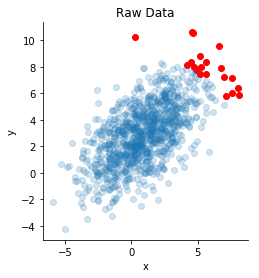

In [3]:
fig, ax = plt.subplots()
ax.scatter(x[0, set1], x[1, set1], c="red")
ax.scatter(x[0, set2], x[1, set2], alpha=0.2)
ax.set_aspect("equal")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Raw Data")

Note that the first step in any form of decorrolation and preprocessing requires us to demean the dataset. Complete the following line of code to demean the data.

In [4]:
## Code Here ##
x -= x.mean(axis=1, keepdims=True)

Now that you have the zero-mean data, you should be able to decorrolate the data using the SVD. Hint: np.linalg.svd might be helpful here.

Text(0.5,1,'Decorrolated Data')

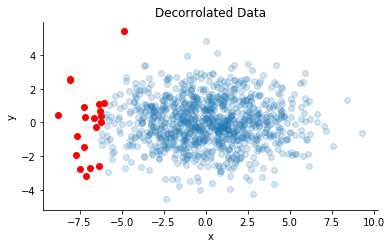

In [5]:
## Code Here ##
U, S, Vt = np.linalg.svd(x)
x_decorrolated = U.T @ x

fig, ax = plt.subplots()
ax.scatter(x_decorrolated[0, set1], x_decorrolated[1, set1], c="red")
ax.scatter(x_decorrolated[0, set2], x_decorrolated[1, set2], alpha=0.2)
ax.set_aspect("equal")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Decorrolated Data")



You might notice that when we decorrolated the data, the direction that the indicated data points went in rotated. Can you justify why this transformation on the data matrix caused this rotation of the matrix?

## Student solution here ##

You can see that in the original dataset, the indicated data points were at the end of one of the principle axices of the dataset. We can very clearly see that there were 2 direction of maximum variance that the dataset is built in. Since these points were all approximately on the same side of the same principle axis, when we multiply by $U^\top $, we can see that the datapoints will rotate to be along the long axis.

Now that we have decorrolated the data, apply the proper transformation to PCA whiten the data. 
Note: due to the numerical stability of the SVD, we are afraid that this might exacerbate the variance of the data due to the numerical instability. Thus, instead of directly dividing by $1/\sigma_i$, we will add a small epsilon to the singular values to regularize the expression. 

Text(0.5,1,'PCA whitened Data')

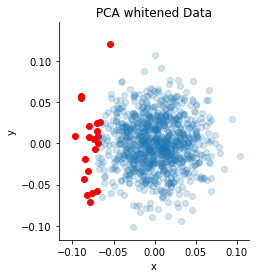

In [6]:
epsilon = 1e-5
## Code Here ##
inv = np.diag(1/S + epsilon)
x_pca = np.dot(inv, x_decorrolated)
                
fig, ax = plt.subplots()
ax.scatter(x_pca [0, set1], x_pca [1, set1], c="red")
ax.scatter(x_pca [0, set2], x_pca [1, set2], alpha=0.2)
ax.set_aspect("equal")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("PCA whitened Data")

Now, we can see that whitening the data did indeed transform the data into a nice circular blob. However, we might have issue with the fact that the data points were rotated. Now, apply the proper rotation matrix to the data to make the transformation the ZCA transformation

Text(0.5,1,'ZCA whitened Data')

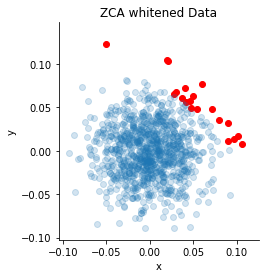

In [7]:
## Code Here ##
x_zca = U @ x_pca

fig, ax = plt.subplots()
ax.scatter(x_zca[0, set1], x_zca [1, set1], c="red")
ax.scatter(x_zca[0, set2], x_zca [1, set2], alpha=0.2)
ax.set_aspect("equal")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("ZCA whitened Data")

We now see that we have whitened the dataset, and the notes and slides give a good explination for why whitening would help your algorithm learn on the data. However, can you think of any reason not to whiten your data?

## Student solution here ##
1. If you are training with something like a neural network, the whitening operation can have diminishing returns expecially for convnets. If you are using an algorithm that is scale invariance, where scaling data doesn't actually affect the learning, whitening won't necessarily help. 

2. Sometimes the variances in the dataset are relevant to what you want to learn. If you think about it, whitening is a form of target scaling where each feature is specifically scaled so that the variances are uniform. However, just like you read in the normalizing/ standardizing notes, if you have outside knowledge of the dataset, you might not want to normalize the data. However, you should probably at least zero-mean the data and potentially normalize the data. 

# Whitening Images with Cifar10 #

Instead of whitening raw datapoints, let us see what whitening does to images. We will be using cifar10 as our dataset.

In [16]:
import tensorflow
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [9]:
X = X_train[:1000]
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
X.shape

(1000, 3072)

This is just a helper function here to visualize the images in the dataset.

In [10]:
def show_image(X, i):
    plt.figure()
    plt.imshow(X[i].reshape(32, 32, 3))
    plt.show()
    plt.close()

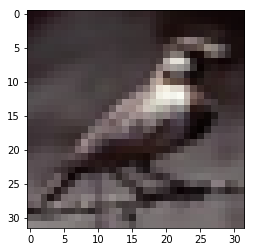

In [11]:
show_image(X, (int)(random.random() * X.shape[0]))

We need to first normalize and demean our data.

In [12]:
## Code Here ##
X_scale = X/255
X_zero = X_scale - X_scale.mean(axis=0)

Implement the ZCA whitening transformation on the image dataset. Note that in order to show the dataset with show_image, we need to normalize the data again. Note that the maximum value and the minimum values will not just be 0 and 255 anymore 

In [13]:
epsilon = 1e-5
## Code Here ##
U, S, Vt = np.linalg.svd(X_zero)
XZ = U @ np.diag(1/S + epsilon) @ U.T @ X_zero
XZ = (XZ - XZ.min()) / (XZ.max() - XZ.min())

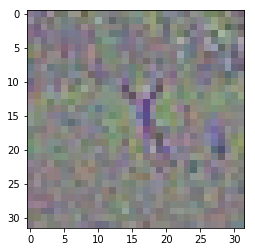

In [14]:
show_image(XZ, (int)(random.random() * X.shape[0]))

Now, let us try and visualize multiple images before and after zca whitening and answer the following question about the visualization

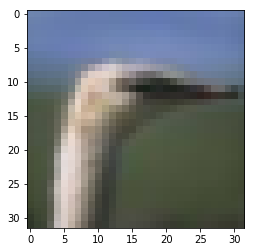

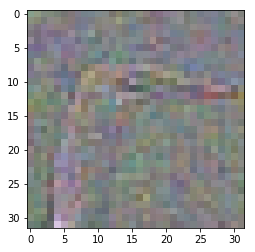

In [15]:
i = (int)(random.random() * X.shape[0])
show_image(X, i)
show_image(XZ,i)

Try rerunning the cell above to see how each of the images change after whitening; how do you think whitening could help an algorithm identify objects.

## Student Answer Here ##

The main thing is that things like boundaries and lines in the original image become exagerated while small changes in things like texture or color are now less relevant. The original features that might have had high variance are now negligable and lower variance objects like edges are more pernounced.